# <font color="red"> Spaceship Titanic

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv** - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("train.csv")

In [3]:
df1.shape

(8693, 14)

In [4]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df1.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df2=pd.read_csv("test.csv")

In [7]:
df=df1.append(df2)

C:\Users\huawei\AppData\Local\Temp\ipykernel_12972\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [8]:
df.shape,df1.shape,df2.shape

((12970, 14), (8693, 14), (4277, 13))

In [9]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


## <font color = "purple"> EDA -Exploratory data analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [12]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [14]:
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.067300,0.124447,0.034959,0.118992,0.101441
RoomService,0.067300,1.000000,-0.020146,0.057402,0.008936,-0.023847
FoodCourt,0.124447,-0.020146,1.000000,-0.001589,0.228990,0.244279
ShoppingMall,0.034959,0.057402,-0.001589,1.000000,0.010504,0.004485
Spa,0.118992,0.008936,0.228990,0.010504,1.000000,0.149874
VRDeck,0.101441,-0.023847,0.244279,0.004485,0.149874,1.000000


## <font color = "purple"> Future Engineering

### Transported

* When the "Transported" column has a bool (boolean) data type, it can only have two possible values: True or False. True represents a positive or affirmative answer, while False represents a negative or negative answer.

Text(0.5, 0, 'Age')

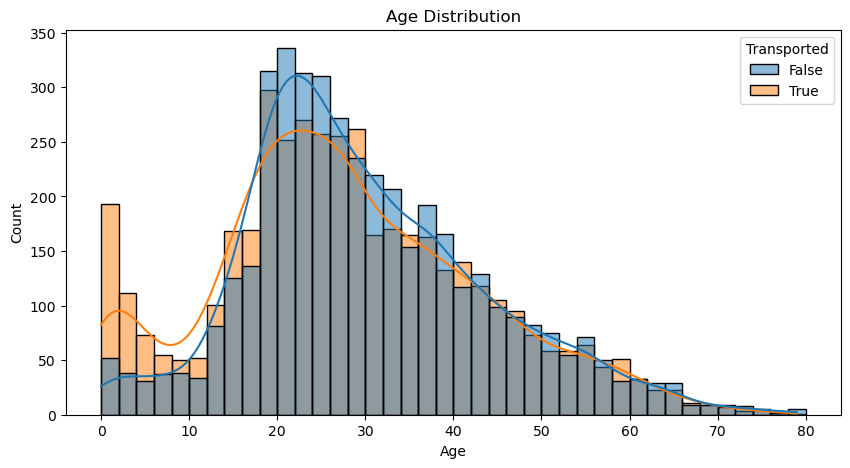

In [15]:
plt.figure(figsize=(10,5))

sns.histplot(data=df1, x="Age",hue="Transported", binwidth=2, kde=True)

plt.title("Age Distribution")
plt.xlabel("Age")

In [16]:
#Age column has 0 values

In [17]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

### PassengerId

* The purpose of these codes is to create a new column named "FamilyId" from the PassengerId column and then calculate the group size for each group

In [18]:
def find_family(PassengerId):
    return PassengerId[:4]

In [19]:
df["FamilyId"]=df["PassengerId"].apply(find_family)

In [20]:
df["FamilyId"]

0       0001
1       0002
2       0003
3       0003
4       0004
        ... 
4272    9266
4273    9269
4274    9271
4275    9273
4276    9277
Name: FamilyId, Length: 12970, dtype: object

In [21]:
df["GroupSize"]=df["FamilyId"].map(df["FamilyId"].value_counts())

In [22]:
df["GroupSize"]

0       1
1       1
2       2
3       2
4       1
       ..
4272    2
4273    1
4274    1
4275    1
4276    1
Name: GroupSize, Length: 12970, dtype: int64

In [23]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FamilyId,GroupSize
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1


In [24]:
df=df.drop("PassengerId",axis=1)

In [25]:
del df["Name"]

### HomePLanet

In [26]:
df["HomePlanet"].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


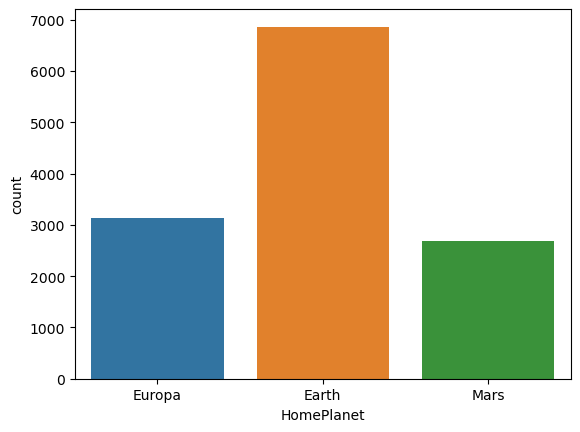

In [27]:
sns.countplot(df["HomePlanet"])
plt.show()

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

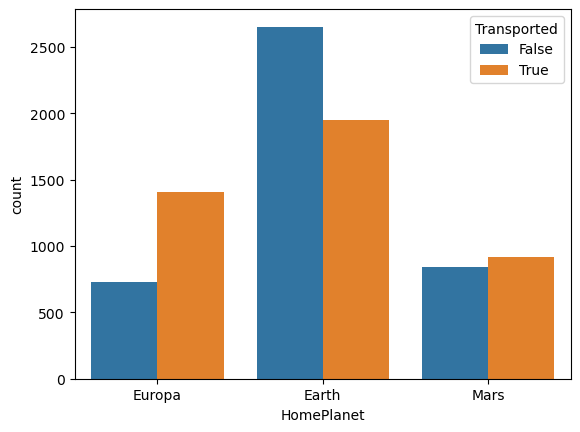

In [28]:
sns.countplot(df["HomePlanet"],hue=df["Transported"])

In [29]:
df["HomePlanet"].isnull().sum()

288

In [30]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(df,col):
    # Convert strings to numeric values with LabelEncoder
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col].astype(str))
    return df


#le=LabelEncoder()
# Converting numeric values back to strings with LabelEncoder
#df[col]=le.inverse_transform(df[col].astype(int))

In [31]:
from sklearn.preprocessing import LabelEncoder

# Convert strings to numeric values with LabelEncoder
le=LabelEncoder()
df1["HomePlanet"]=le.fit_transform(df1["HomePlanet"].astype(str))

# Converting numeric values back to strings with LabelEncoder
#df[col]=le.inverse_transform(df[col].astype(int))


In [32]:
abs(df1.corr()["HomePlanet"].sort_values(ascending=False)) #Very low correlation with "Transported"


HomePlanet      1.000000
RoomService     0.194435
Age             0.124376
Transported     0.107755
ShoppingMall    0.090020
FoodCourt       0.056788
Spa             0.045538
VRDeck          0.035397
Name: HomePlanet, dtype: float64

In [33]:
del df["HomePlanet"]

## CryoSleep

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


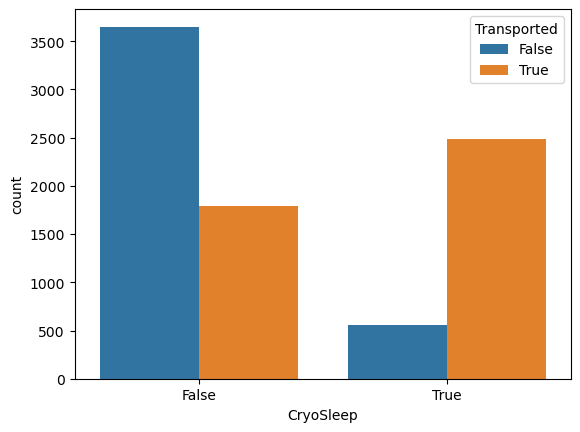

In [34]:
sns.countplot(df["CryoSleep"],hue=df["Transported"])
plt.show()

In [35]:
df["CryoSleep"].isnull().sum()

310

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


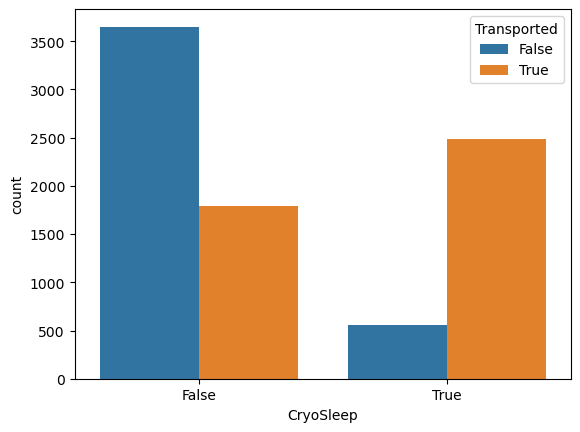

In [36]:
sns.countplot(df["CryoSleep"],hue=df["Transported"])
plt.show()

In [37]:
df1["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [38]:
le=LabelEncoder()
df1["CryoSleep"]=le.fit_transform(df1["CryoSleep"].astype(str))

In [39]:
abs(df1.corr()["CryoSleep"].sort_values(ascending=False)) #High correlation with "Transported"


CryoSleep       1.000000
Transported     0.404716
HomePlanet      0.068726
Age             0.069141
VRDeck          0.173856
Spa             0.180362
FoodCourt       0.183855
ShoppingMall    0.189642
RoomService     0.219033
Name: CryoSleep, dtype: float64

In [40]:
df1["CryoSleep"].value_counts()

0    5439
1    3037
2     217
Name: CryoSleep, dtype: int64

In [41]:
df["CryoSleep"]=df["CryoSleep"].fillna(df.groupby("Transported")["CryoSleep"].transform("median"))

In [42]:
df["CryoSleep"].value_counts()

False    8190
True     4687
Name: CryoSleep, dtype: int64

In [43]:
df["CryoSleep"].isnull().sum()

93

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


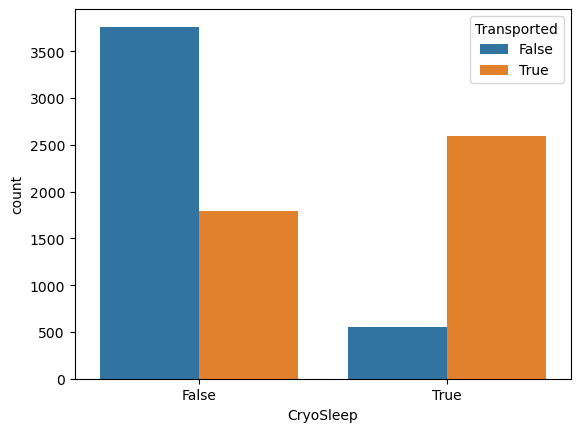

In [44]:
sns.countplot(df["CryoSleep"],hue=df["Transported"])
plt.show()

In [45]:
le=LabelEncoder()
df2["CryoSleep"]=le.fit_transform(df2["CryoSleep"].astype(str))
abs(df2.corr()["CryoSleep"].sort_values(ascending=False)) #High correlation with "RoomService"


CryoSleep       1.000000
Age             0.033458
VRDeck          0.170814
Spa             0.173134
FoodCourt       0.201778
ShoppingMall    0.216275
RoomService     0.241009
Name: CryoSleep, dtype: float64

In [46]:
df["CryoSleep"]=df["CryoSleep"].fillna(df.groupby("RoomService")["CryoSleep"].transform("median"))

C:\Users\huawei\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\huawei\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\huawei\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\huawei\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\huawei\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\huawei\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepd

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


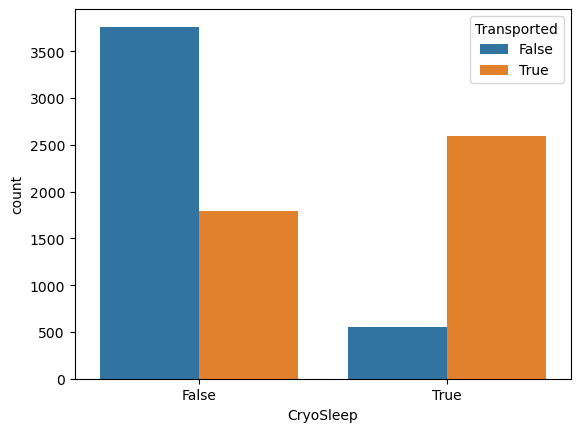

In [47]:
sns.countplot(df["CryoSleep"],hue=df["Transported"])
plt.show()

In [48]:
df["CryoSleep"].isnull().sum()

8

In [49]:
df["CryoSleep"]=df["CryoSleep"].fillna(df.groupby("ShoppingMall")["CryoSleep"].transform("median"))

C:\Users\huawei\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [50]:
df["CryoSleep"].isnull().sum()

1

In [51]:
df["CryoSleep"]=df["CryoSleep"].fillna(df.groupby("FoodCourt")["CryoSleep"].transform("median"))

In [52]:
df["CryoSleep"].isnull().sum()

0

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


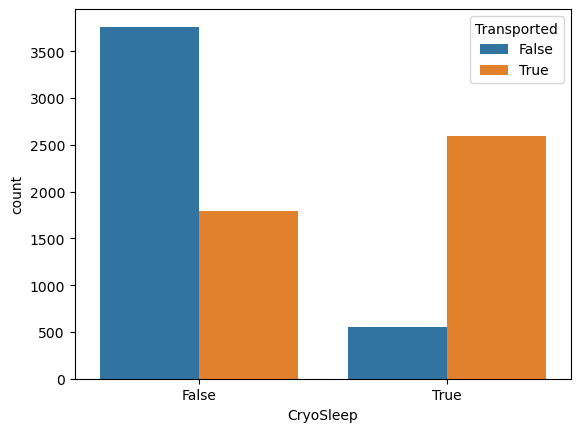

In [53]:
sns.countplot(df["CryoSleep"],hue=df["Transported"])
plt.show()

In [54]:
df["CryoSleep"].value_counts()

False    8224
True     4746
Name: CryoSleep, dtype: int64

In [55]:
df["CryoSleep"]=df["CryoSleep"].astype(int)

In [56]:
df["CryoSleep"]

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 12970, dtype: int32

## Age

Text(0.5, 0, 'Age')

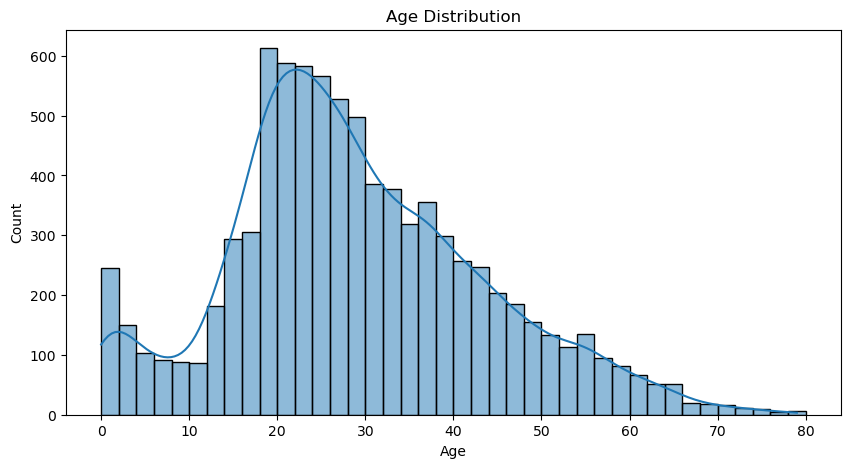

In [57]:
plt.figure(figsize=(10,5))

sns.histplot(data=df1, x="Age", binwidth=2, kde=True)

plt.title("Age Distribution")
plt.xlabel("Age")

In [58]:
df["Age"].isnull().sum()

270

Text(0.5, 0, 'Age')

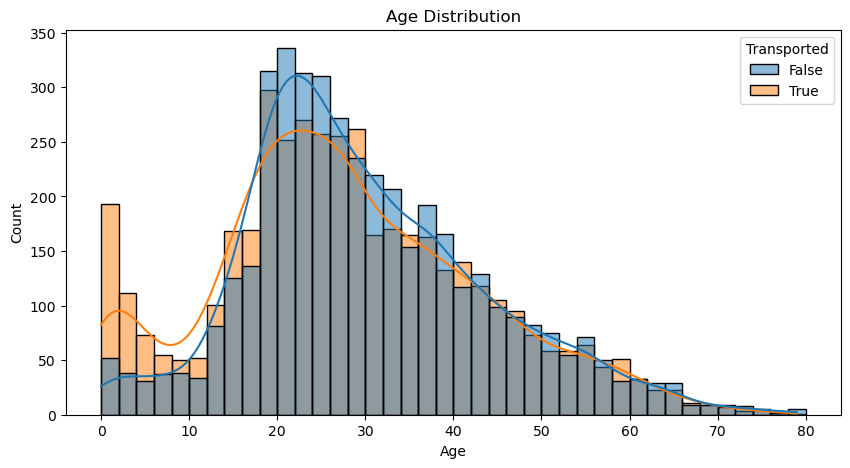

In [59]:
plt.figure(figsize=(10,5))

sns.histplot(data=df1, x="Age",hue="Transported", binwidth=2, kde=True)

plt.title("Age Distribution")
plt.xlabel("Age")

In [60]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=10)

X = df[["Age"]]

X_imputed=imputer.fit_transform(X)

df["Age"]=X_imputed

In [61]:
df["Age"].value_counts

<bound method IndexOpsMixin.value_counts of 0       39.000000
1       24.000000
2       58.000000
3       33.000000
4       16.000000
          ...    
4272    34.000000
4273    42.000000
4274    28.771969
4275    28.771969
4276    43.000000
Name: Age, Length: 12970, dtype: float64>

In [62]:
df["Age"]=df["Age"].astype(int)

## VIP

In [63]:
df["VIP"].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [64]:
df["VIP"].isnull().sum()

296

In [65]:
df["VIP"].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

In [66]:
df["VIP"].isnull().sum()

296

In [67]:
df["VIP"].head()

0    False
1    False
2     True
3    False
4    False
Name: VIP, dtype: object

In [68]:
df["VIP"]=df["VIP"].replace({False:0,True:1})

In [69]:
#df["VIP"]=df["VIP"].astype(int)

In [70]:
df["VIP"].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: VIP, dtype: float64

In [71]:
df["VIP"].isnull().sum()

296

In [72]:
abs(df.corr()["VIP"].sort_values(ascending=False)) #Low correlation

VIP             1.000000
FoodCourt       0.128288
VRDeck          0.113856
Spa             0.082750
Age             0.081858
RoomService     0.060926
ShoppingMall    0.024289
GroupSize       0.003905
CryoSleep       0.080040
Name: VIP, dtype: float64

In [73]:
del df["VIP"]

## RoomService

In [74]:
df["RoomService"].value_counts()

0.0       8303
1.0        185
2.0        113
3.0         89
4.0         71
          ... 
263.0        1
271.0        1
922.0        1
3905.0       1
652.0        1
Name: RoomService, Length: 1578, dtype: int64

In [75]:
df["RoomService"].isnull().sum()

263

In [76]:
abs(df.corr()["RoomService"].sort_values(ascending=False)) #Correlatin with CryoSleep

RoomService     1.000000
Age             0.066848
ShoppingMall    0.057402
Spa             0.008936
FoodCourt       0.020146
VRDeck          0.023847
GroupSize       0.033886
CryoSleep       0.259521
Name: RoomService, dtype: float64

In [77]:
df["RoomService"]=df["RoomService"].fillna(df.groupby("CryoSleep")["RoomService"].transform("mean"))

In [78]:
df["RoomService"].isnull().sum()

0

In [79]:
abs(df.corr()["RoomService"].sort_values(ascending=False)) #Correlatin with CryoSleep

RoomService     1.000000
Age             0.066877
ShoppingMall    0.057941
Spa             0.009922
FoodCourt       0.018748
VRDeck          0.022384
GroupSize       0.034945
CryoSleep       0.261997
Name: RoomService, dtype: float64

## FoodCourt

In [80]:
df["FoodCourt"].isnull().sum()

289

In [81]:
abs(df.corr()["FoodCourt"].sort_values(ascending=False)) #low correlation with Transported

FoodCourt       1.000000
VRDeck          0.244279
Spa             0.228990
Age             0.122439
GroupSize       0.019643
ShoppingMall    0.001589
RoomService     0.018748
CryoSleep       0.208559
Name: FoodCourt, dtype: float64

In [82]:
df["FoodCourt"]=df["FoodCourt"].fillna(df.groupby("VRDeck")["FoodCourt"].transform("mean"))
df["FoodCourt"].isnull().sum()

df["FoodCourt"]=df["FoodCourt"].fillna(df.groupby("Spa")["FoodCourt"].transform("mean"))
df["FoodCourt"].isnull().sum()

df["FoodCourt"]=df["FoodCourt"].fillna(df.groupby("CryoSleep")["FoodCourt"].transform("mean"))
df["FoodCourt"].isnull().sum()

0

## ShoppingMall

In [83]:
df["ShoppingMall"].isnull().sum()

306

In [84]:
abs(df.corr()["ShoppingMall"].sort_values(ascending=False))

ShoppingMall    1.000000
RoomService     0.057941
Age             0.034633
Spa             0.010504
VRDeck          0.004485
FoodCourt       0.001128
GroupSize       0.039131
CryoSleep       0.218860
Name: ShoppingMall, dtype: float64

In [85]:
df["ShoppingMall"]=df["ShoppingMall"].fillna(df.groupby("CryoSleep")["ShoppingMall"].transform("mean"))
df["ShoppingMall"].isnull().sum()

0

## Spa

In [86]:
df["Spa"].isnull().sum()

284

In [87]:
abs(df.corr()["Spa"].sort_values(ascending=False))

Spa             1.000000
FoodCourt       0.228612
VRDeck          0.149874
Age             0.117232
GroupSize       0.017875
ShoppingMall    0.011299
RoomService     0.009922
CryoSleep       0.201574
Name: Spa, dtype: float64

In [88]:
df["Spa"]=df["Spa"].fillna(df.groupby("FoodCourt")["Spa"].transform("mean"))
df["Spa"].isnull().sum()
df["Spa"]=df["Spa"].fillna(df.groupby("CryoSleep")["Spa"].transform("mean"))
df["Spa"].isnull().sum()

0

## VRDeck

In [89]:
df["VRDeck"].isnull().sum()

268

In [90]:
abs(df.corr()["VRDeck"].sort_values(ascending=False))

VRDeck          1.000000
FoodCourt       0.241653
Spa             0.146096
Age             0.101043
GroupSize       0.009689
ShoppingMall    0.006161
RoomService     0.022384
CryoSleep       0.194749
Name: VRDeck, dtype: float64

In [91]:
df["VRDeck"]=df["VRDeck"].fillna(df.groupby("FoodCourt")["VRDeck"].transform("mean"))
df["VRDeck"].isnull().sum()

24

In [92]:
from sklearn.impute import SimpleImputer

imputer_smp = SimpleImputer(strategy="median")

df["VRDeck"]=imputer_smp.fit_transform(df[["VRDeck"]])

In [93]:
df["VRDeck"].isnull().sum()

0

## Cabin

In [94]:
df["Cabin"].isnull().sum()

299

In [95]:
df[["FamilyId","Cabin"]].tail(6)

,FamilyId,Cabin
4271,9266,F/1796/S
4272,9266,G/1496/S
4273,9269,NaN
4274,9271,D/296/P
4275,9273,D/297/P
4276,9277,G/1498/S


In [96]:
df[["Deck","CabinNum","Side"]]=df["Cabin"].str.split("/",expand=True)

In [97]:
df[["Deck","CabinNum","Side"]]

,Deck,CabinNum,Side
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
4272,G,1496,S
4273,NaN,NaN,NaN
4274,D,296,P
4275,D,297,P


In [98]:
df[["Deck","CabinNum","Side"]] = df[["Deck","CabinNum","Side"]].fillna(method='bfill')

In [99]:
df[["Deck","CabinNum","Side"]].isnull().sum()

Deck        0
CabinNum    0
Side        0
dtype: int64

In [100]:
del df["Cabin"]

## Destination

In [101]:
df["Destination"].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [102]:
df["Destination"].isnull().sum()

274

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


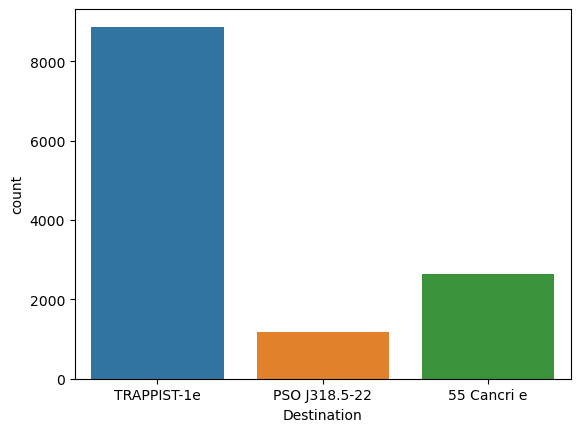

In [103]:
sns.countplot(df["Destination"])
plt.show()

In [104]:
# Convert strings to numeric values with LabelEncoder
le=LabelEncoder()
df1["Destination"]=le.fit_transform(df1["Destination"].astype(str))

In [105]:
abs(df1.corr()["Destination"].sort_values(ascending=False))

Destination     1.000000
RoomService     0.044733
HomePlanet      0.042618
ShoppingMall    0.022977
Age             0.004248
Spa             0.053614
VRDeck          0.073654
CryoSleep       0.085571
Transported     0.104817
FoodCourt       0.110659
Name: Destination, dtype: float64

In [106]:
df1["Destination"].value_counts() #low correlation with Transported

2    5915
0    1800
1     796
3     182
Name: Destination, dtype: int64

In [107]:
df["Destination"] = df["Destination"].fillna(method='bfill')

C:\Users\huawei\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


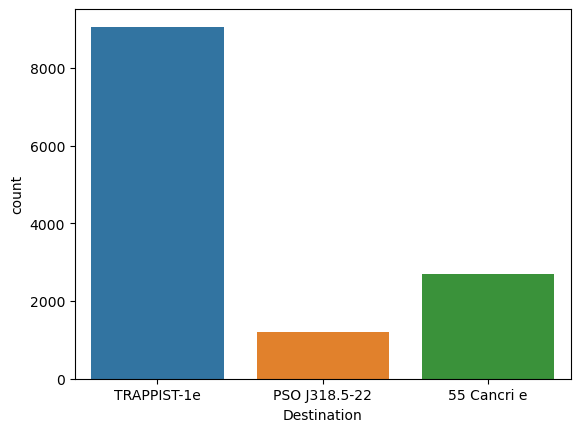

In [108]:
sns.countplot(df["Destination"])
plt.show()

# <font color="purple"> Preparing the Model

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     12970 non-null  int32  
 1   Destination   12970 non-null  object 
 2   Age           12970 non-null  int32  
 3   RoomService   12970 non-null  float64
 4   FoodCourt     12970 non-null  float64
 5   ShoppingMall  12970 non-null  float64
 6   Spa           12970 non-null  float64
 7   VRDeck        12970 non-null  float64
 8   Transported   8693 non-null   object 
 9   FamilyId      12970 non-null  object 
 10  GroupSize     12970 non-null  int64  
 11  Deck          12970 non-null  object 
 12  CabinNum      12970 non-null  object 
 13  Side          12970 non-null  object 
dtypes: float64(5), int32(2), int64(1), object(6)
memory usage: 1.4+ MB


In [110]:
df["FamilyId"]=df["FamilyId"].astype(int)

In [111]:
df["CabinNum"]=df["CabinNum"].astype(int)

In [112]:
df.head(5)

,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FamilyId,GroupSize,Deck,CabinNum,Side
0,0,TRAPPIST-1e,39,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0,P
1,0,TRAPPIST-1e,24,109.0,9.0,25.0,549.0,44.0,True,2,1,F,0,S
2,0,TRAPPIST-1e,58,43.0,3576.0,0.0,6715.0,49.0,False,3,2,A,0,S
3,0,TRAPPIST-1e,33,0.0,1283.0,371.0,3329.0,193.0,False,3,2,A,0,S
4,0,TRAPPIST-1e,16,303.0,70.0,151.0,565.0,2.0,True,4,1,F,1,S


In [113]:
df=pd.get_dummies(df,columns=["Destination","Deck","Side"],drop_first=True)

In [114]:
train=df[:8693]

In [115]:
train

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FamilyId,GroupSize,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0,39,0.0,0.0,0.0,0.0,0.0,False,1,1,...,0,1,1,0,0,0,0,0,0,0
1,0,24,109.0,9.0,25.0,549.0,44.0,True,2,1,...,0,1,0,0,0,0,1,0,0,1
2,0,58,43.0,3576.0,0.0,6715.0,49.0,False,3,2,...,0,1,0,0,0,0,0,0,0,1
3,0,33,0.0,1283.0,371.0,3329.0,193.0,False,3,2,...,0,1,0,0,0,0,0,0,0,1
4,0,16,303.0,70.0,151.0,565.0,2.0,True,4,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41,0.0,6819.0,0.0,1643.0,74.0,False,9276,1,...,0,0,0,0,0,0,0,0,0,0
8689,1,18,0.0,0.0,0.0,0.0,0.0,False,9278,1,...,1,0,0,0,0,0,0,1,0,1
8690,0,26,0.0,0.0,1872.0,1.0,0.0,True,9279,1,...,0,1,0,0,0,0,0,1,0,1
8691,0,32,0.0,1049.0,0.0,353.0,3235.0,False,9280,2,...,0,0,0,0,0,1,0,0,0,1


In [116]:
train["Transported"]=train["Transported"].astype(int)

C:\Users\huawei\AppData\Local\Temp\ipykernel_12972\3580446364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Transported"]=train["Transported"].astype(int)


In [117]:
train.tail()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FamilyId,GroupSize,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
8688,0,41,0.0,6819.0,0.0,1643.0,74.0,0,9276,1,...,0,0,0,0,0,0,0,0,0,0
8689,1,18,0.0,0.0,0.0,0.0,0.0,0,9278,1,...,1,0,0,0,0,0,0,1,0,1
8690,0,26,0.0,0.0,1872.0,1.0,0.0,1,9279,1,...,0,1,0,0,0,0,0,1,0,1
8691,0,32,0.0,1049.0,0.0,353.0,3235.0,0,9280,2,...,0,0,0,0,0,1,0,0,0,1
8692,0,44,126.0,4688.0,0.0,0.0,12.0,1,9280,2,...,0,1,0,0,0,1,0,0,0,1


In [118]:
test=df[8693:]

In [119]:
test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,FamilyId,GroupSize,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,1,27,0.0,0.0,0.0,0.0,0.0,NaN,13,1,...,0,1,0,0,0,0,0,1,0,1
1,0,19,0.0,9.0,0.0,2823.0,0.0,NaN,18,1,...,0,1,0,0,0,0,1,0,0,1
2,1,31,0.0,0.0,0.0,0.0,0.0,NaN,19,1,...,0,0,0,1,0,0,0,0,0,1
3,0,38,0.0,6652.0,0.0,181.0,585.0,NaN,21,1,...,0,1,0,1,0,0,0,0,0,1
4,0,20,10.0,0.0,635.0,0.0,0.0,NaN,23,1,...,0,1,0,0,0,0,1,0,0,1


<AxesSubplot:>

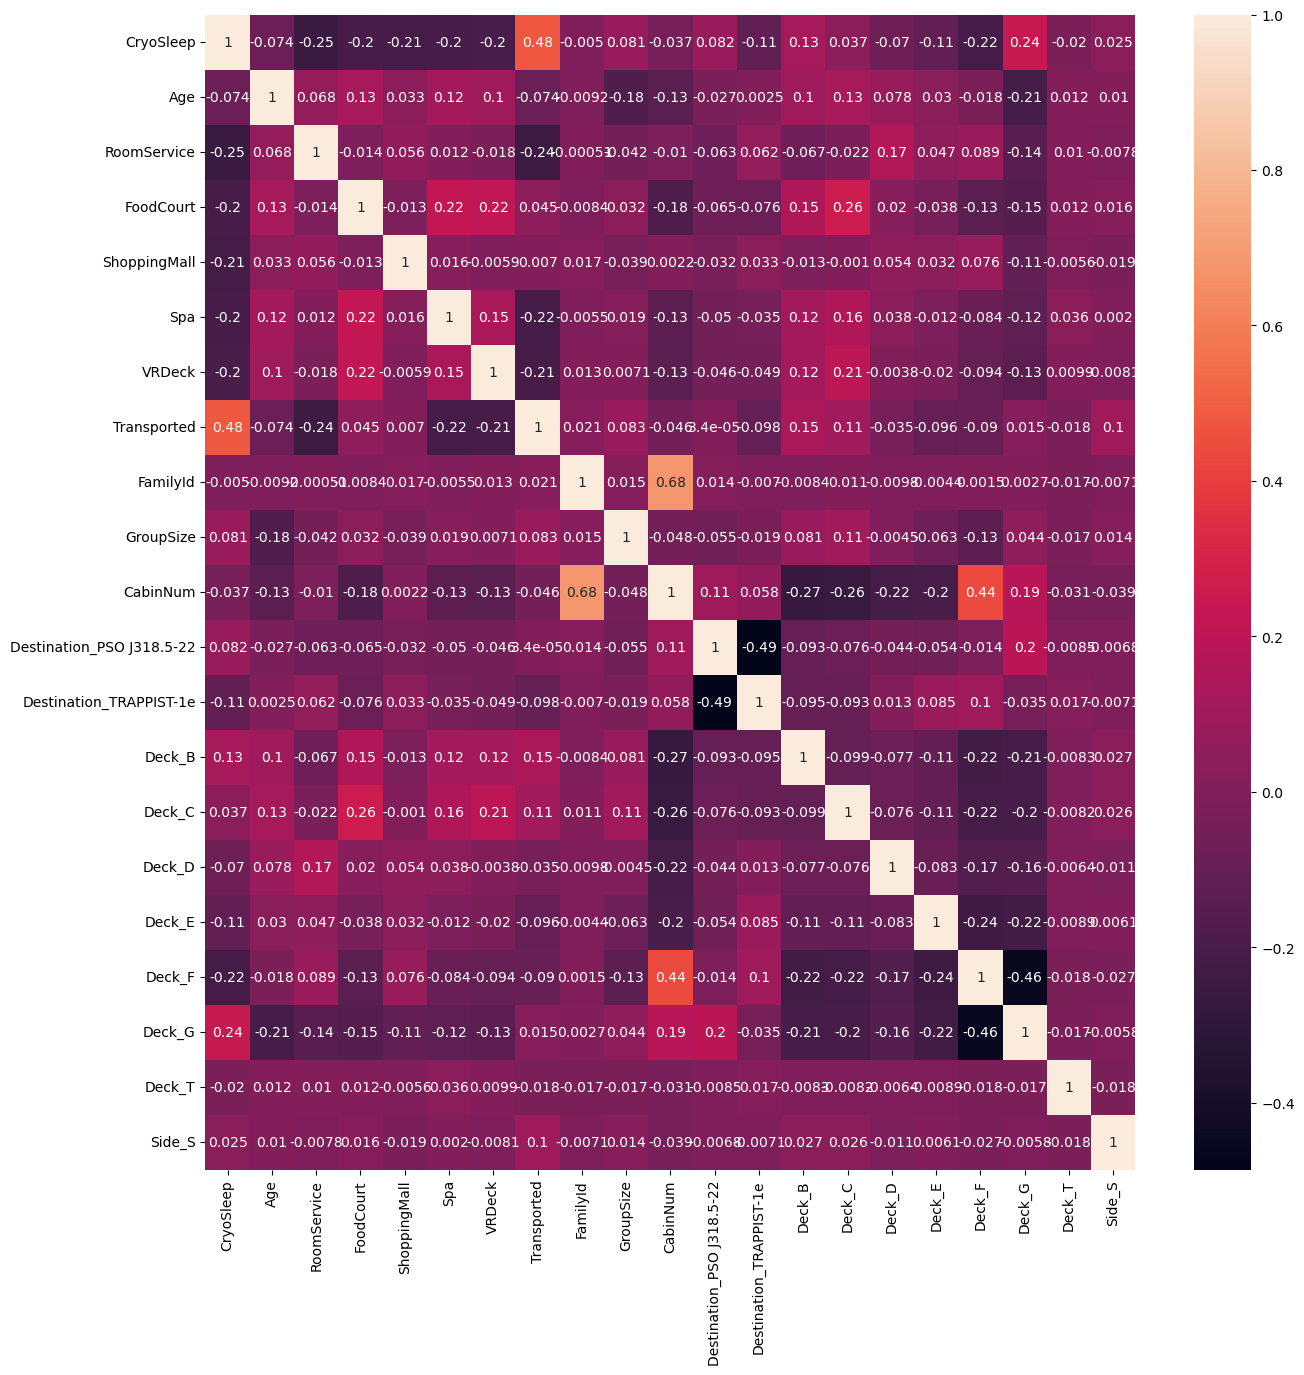

In [120]:
plt.figure(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

In [121]:
abs(train.corr()["Transported"].sort_values(ascending=False))

Transported                  1.000000
CryoSleep                    0.481802
Deck_B                       0.145592
Deck_C                       0.110704
Side_S                       0.104279
GroupSize                    0.082644
FoodCourt                    0.045097
FamilyId                     0.021491
Deck_G                       0.014815
ShoppingMall                 0.006990
Destination_PSO J318.5-22    0.000034
Deck_T                       0.017712
Deck_D                       0.034752
CabinNum                     0.046043
Age                          0.074245
Deck_F                       0.089740
Deck_E                       0.095620
Destination_TRAPPIST-1e      0.098134
VRDeck                       0.205512
Spa                          0.218766
RoomService                  0.244458
Name: Transported, dtype: float64

In [122]:
x=train.drop("Transported",axis=1)
y=train["Transported"]

In [123]:
x.isnull().sum()

CryoSleep                    0
Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
FamilyId                     0
GroupSize                    0
CabinNum                     0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
Side_S                       0
dtype: int64

## <font color = "purple"> Model

In [124]:
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.metrics import f1_score

import xgboost as xgb


In [125]:
def algo_test (x,y):
    
    g = GaussianNB()
    b = BernoulliNB()
    k = KNeighborsClassifier()
    d=DecisionTreeClassifier()
    gb=GradientBoostingClassifier()
    rgc= RandomForestClassifier()
    xgb1= xgb.XGBClassifier()

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
    
    algos= [g,b,k,d,gb,rgc,xgb1]
    algo_names = ["GaussianNB","BernoulliNB","KNeighborsClassifier","DecisionTreeClassifier",
                 "GradientBoostingClassifier","RandomForestClassifier","Xgboost"]
                
    accuracy= []
    confusion = []
    fone=[]
    
    result = pd.DataFrame(columns=["Accuracy","Confusion","F1"],index = algo_names)
    
    for algo in algos:
        algo.fit(x_train,y_train)
        accuracy.append(accuracy_score(y_test,algo.predict(x_test)))
        confusion.append(confusion_matrix(y_test,algo.predict(x_test)))
        fone.append(f1_score(y_test, algo.predict(x_test)))
       
    
     
        
    result.Accuracy = accuracy
    result.Confusion = confusion
    result.F1 = fone
   
    
    return result.sort_values("Accuracy", ascending=False)

In [126]:
algo_test(x,y)

C:\Users\huawei\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\huawei\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

,Accuracy,Confusion,F1
GradientBoostingClassifier,0.795860,"[[651, 210], [145, 733]]",0.805052
Xgboost,0.787234,"[[678, 183], [187, 691]]",0.788813
RandomForestClassifier,0.786084,"[[687, 174], [198, 680]]",0.785219
KNeighborsClassifier,0.753306,"[[639, 222], [207, 671]]",0.757764
BernoulliNB,0.738355,"[[680, 181], [274, 604]]",0.726398
DecisionTreeClassifier,0.738355,"[[624, 237], [218, 660]]",0.743662
GaussianNB,0.732030,"[[474, 387], [79, 799]]",0.774225


In [127]:
abs(train.corr()["Transported"].sort_values(ascending=False))

Transported                  1.000000
CryoSleep                    0.481802
Deck_B                       0.145592
Deck_C                       0.110704
Side_S                       0.104279
GroupSize                    0.082644
FoodCourt                    0.045097
FamilyId                     0.021491
Deck_G                       0.014815
ShoppingMall                 0.006990
Destination_PSO J318.5-22    0.000034
Deck_T                       0.017712
Deck_D                       0.034752
CabinNum                     0.046043
Age                          0.074245
Deck_F                       0.089740
Deck_E                       0.095620
Destination_TRAPPIST-1e      0.098134
VRDeck                       0.205512
Spa                          0.218766
RoomService                  0.244458
Name: Transported, dtype: float64

In [128]:
train.columns

Index(['CryoSleep', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'FamilyId', 'GroupSize', 'CabinNum',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Side_S'],
      dtype='object')

## <font color="red"> GradientBoostingClassifier

In [135]:
gb=GradientBoostingClassifier()
pred=gb.fit(x,y).predict(test.drop("Transported",axis=1))
sonuc_gb=pd.DataFrame()

In [136]:
sonuc_gb["PassengerId"]=df2["PassengerId"]
sonuc_gb["Transported"]=pred

In [137]:
sonuc_gb

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
...,...,...
4272,9266_02,1
4273,9269_01,0
4274,9271_01,1
4275,9273_01,1


In [140]:
sonuc_gb["Transported"]=sonuc_gb["Transported"].replace({1:True,0:False})

In [141]:
sonuc_gb

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [142]:
sonuc_gb.to_csv("SpaceShip.csv", index=False)

In [ ]:
#submission score is 0.80